In [293]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [294]:
from sequence_creator import *
from model_trainer import *
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
def plot_features_importance(importances, feature_names, threshold): 
        
    feature1 = importances[:threshold]
    feature2 = importances[threshold:2*threshold]
    feature3 = importances[2*threshold:]
    
    features = [feature1, feature2, feature3]
    dfs = []
    
    for feature, name in zip(features, feature_names):
        df = pd.DataFrame(feature, columns=['importance'])
        df['feature'] = name
        df['index'] = df.index
        dfs.append(df)
        
    df_all = pd.concat(dfs, axis=0)
    
    
    # plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='index', y='importance', hue='feature', data=df_all)

    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature Index')
    plt.yscale('log')

    plt.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

## Padding before

In [296]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

data_folder_path = os.path.join(root_dir, 'data')

file_path = os.path.join(data_folder_path, 'robotarm.csv')

df = pd.read_csv(file_path)

In [297]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5, 
              "padding":"pre"}

In [298]:
sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, models = model_trainer.cross_validate()

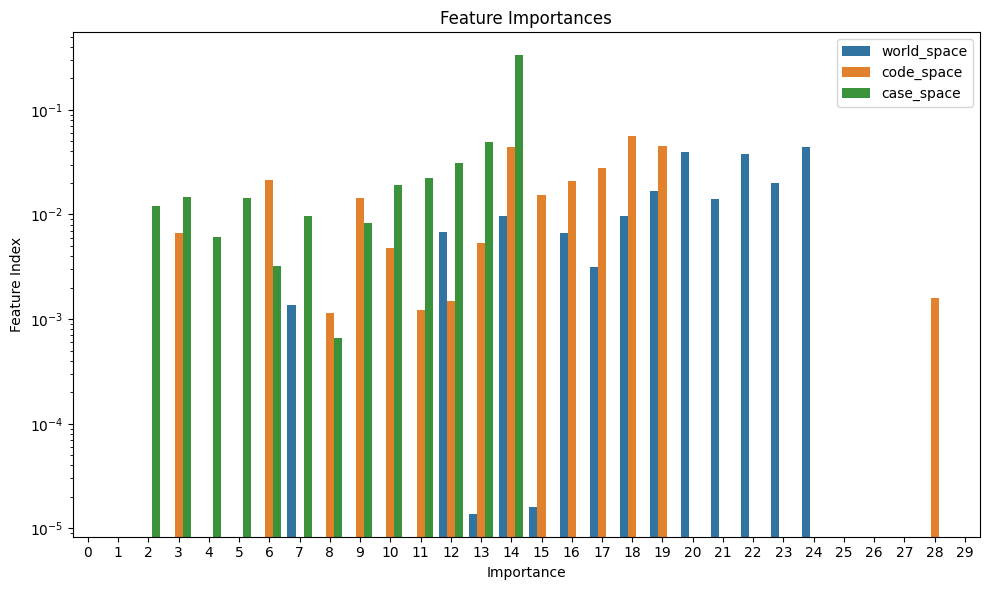

In [299]:
importances = models[0].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

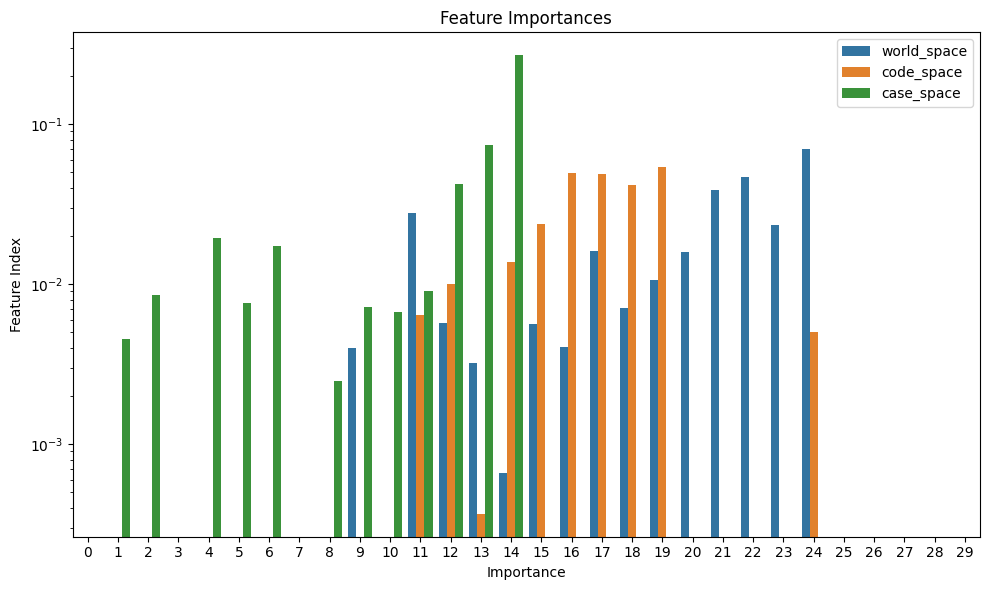

In [300]:
importances = models[1].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

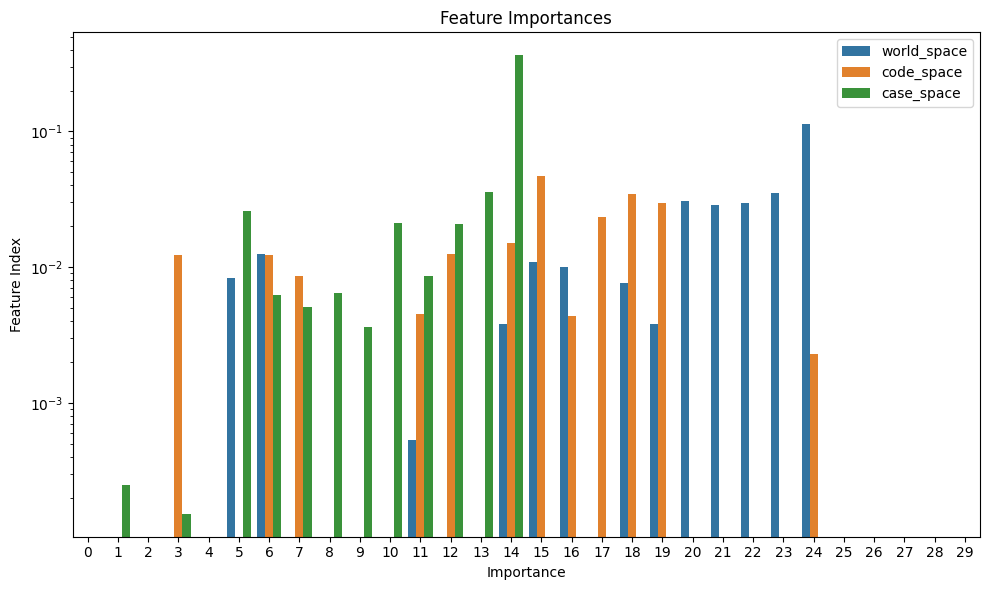

In [301]:
importances = models[2].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

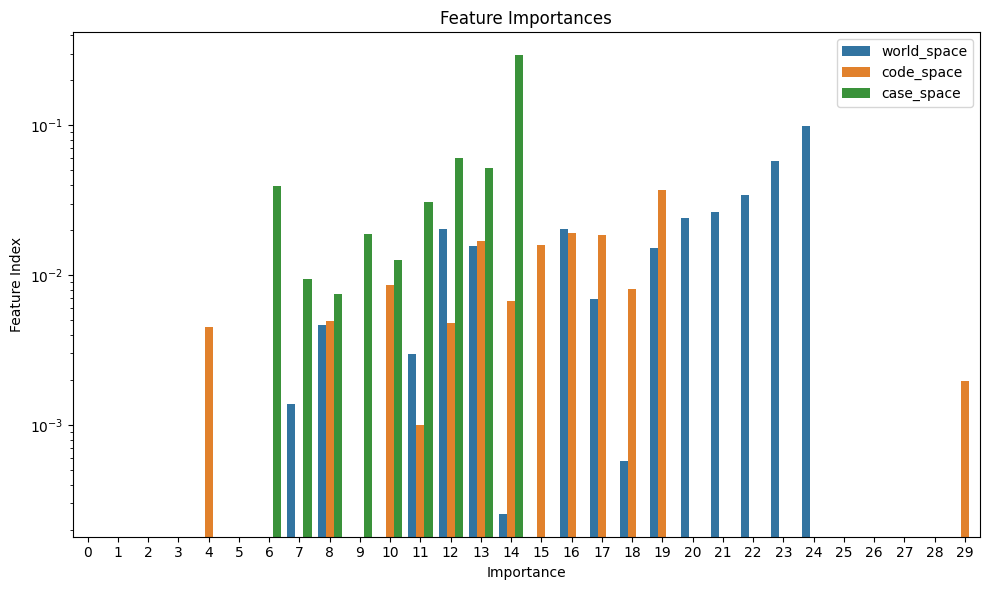

In [302]:
importances = models[3].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

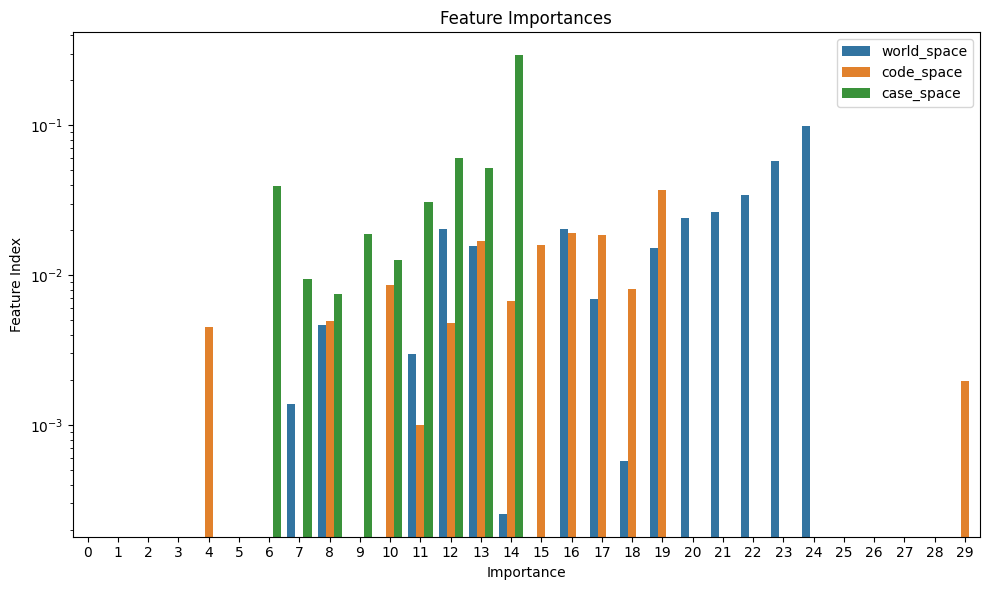

In [303]:
importances = models[3].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

### Other tests

In [304]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 6.03770926e-04, 1.19553622e-04,
       1.37768800e-04, 1.70833212e-03, 1.43186781e-03, 2.09605940e-03,
       4.06777879e-04, 1.26888754e-03, 5.74805385e-04, 3.66335680e-03,
       3.85120605e-03, 5.19106649e-03, 9.12134286e-03, 6.77300069e-03,
       9.07170873e-03, 1.00438476e-02, 1.10724386e-02, 2.43730157e-02,
       3.02090766e-02, 3.58326422e-02, 3.56274964e-02, 3.51972641e-02,
       8.32941103e-02, 0.00000000e+00, 0.00000000e+00, 3.07181386e-04,
       4.66535242e-04, 0.00000000e+00, 0.00000000e+00, 7.08963192e-04,
       1.00213858e-03, 1.17175049e-03, 9.51783352e-04, 5.92910083e-04,
       3.29687237e-03, 8.75784208e-04, 1.73997426e-03, 5.54671295e-03,
       4.79515157e-03, 7.56900812e-03, 9.02285256e-03, 9.45997334e-03,
       1.83179924e-02, 1.88846257e-02, 2.33784366e-02, 2.34436948e-02,
       3.51852189e-02, 2.58701955e-02, 0.00000000e+00, 0.00000000e+00,
       1.78640904e-04, 6.68255144e-04, 5.93247072e-04, 4.26541318e-04,
      

In [305]:
results

[{'Mean AUC': '0.85',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.82',
  'Standard Deviation of Accuracy': '0.02'}]

In [306]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.00000000e+00 0.00000000e+00 3.17607840e-04 2.06137690e-05
 1.12053651e-04 5.50086239e-04 1.31526603e-03 2.33801794e-03
 9.58944725e-04 8.85445834e-04 9.69574045e-04 3.25329532e-03
 2.53127708e-03 4.93783903e-03 9.41456131e-03 8.80577368e-03
 8.79970535e-03 1.10315843e-02 1.32960556e-02 2.33789463e-02
 2.72887952e-02 3.85338869e-02 3.71009674e-02 3.69237757e-02
 9.01910667e-02 0.00000000e+00 0.00000000e+00 1.96227684e-05
 5.47942773e-05 4.46117682e-04 0.00000000e+00 8.64321814e-05
 1.47743471e-03 1.92179521e-03 1.96384387e-03 5.25052834e-04
 3.66217322e-03 1.03846053e-03 2.38796850e-03 5.53427712e-03
 5.17662228e-03 5.64670171e-03 8.30375241e-03 1.01117113e-02
 1.68821636e-02 1.89800845e-02 2.16524112e-02 2.63696738e-02
 3.29860641e-02 2.80288855e-02 0.00000000e+00 0.00000000e+00
 1.52472047e-04 6.20119749e-04 7.04174602e-04 5.93188566e-04
 1.37413657e-03 1.02657391e-03 7.90838290e-04 4.97041439e-04
 1.29210322e-03 4.63540873e-03 2.65609277e-03 3.10849897e-03
 4.24145923e-03 9.171917

In [307]:
resultargs_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.         0.         0.00274201 0.00107023 0.00097169 0.0053254
 0.00568305 0.00138509 0.00123182 0.00226421 0.00321811 0.0088976
 0.00813234 0.00966592 0.01711814 0.01970917 0.02507184 0.02287702
 0.03234538 0.05036901 0.05164604 0.06520402 0.06766616 0.06180394
 0.13014828 0.         0.         0.000395   0.00042959 0.00056169
 0.         0.00058931 0.00071682 0.00115863 0.00564914 0.00119358
 0.00569495 0.00249812 0.0058197  0.00951556 0.01010099 0.01692033
 0.02146045 0.0250588  0.03717931 0.04229525 0.04504593 0.05903678
 0.06259655 0.05153705]
[{'Mean AUC': '0.64', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.02'}]


In [308]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 6, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world", 
              "evaluate": True,
              "k": 5, 
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, models = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.         0.         0.00274201 0.00107023 0.00097169 0.0053254
 0.00568305 0.00138509 0.00123182 0.00226421 0.00321811 0.0088976
 0.00813234 0.00966592 0.01711814 0.01970917 0.02507184 0.02287702
 0.03234538 0.05036901 0.05164604 0.06520402 0.06766616 0.06180394
 0.13014828 0.         0.         0.000395   0.00042959 0.00056169
 0.         0.00058931 0.00071682 0.00115863 0.00564914 0.00119358
 0.00569495 0.00249812 0.0058197  0.00951556 0.01010099 0.01692033
 0.02146045 0.0250588  0.03717931 0.04229525 0.04504593 0.05903678
 0.06259655 0.05153705]
[{'Mean AUC': '0.65', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


In [309]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "code", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.         0.         0.00370887 0.00830827 0.00264029 0.
 0.00859354 0.00759891 0.00758072 0.02659112 0.00706497 0.02876268
 0.01539648 0.02035462 0.04097169 0.04943349 0.05285731 0.06884174
 0.07592772 0.10708218 0.09334067 0.0801705  0.09531858 0.11323238
 0.08622329]
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.03'}]


In [310]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.00000000e+00 0.00000000e+00 8.12870780e-04 7.02941615e-05
 3.73935026e-04 2.10775925e-03 1.01425001e-03 2.12308040e-03
 1.56547111e-03 1.82117541e-03 1.42473986e-03 3.79720064e-03
 3.54934016e-03 6.06688414e-03 1.27205270e-02 1.33271278e-02
 1.21806341e-02 1.66085281e-02 1.93604316e-02 3.76741836e-02
 4.04710449e-02 4.52455475e-02 5.10648636e-02 4.03534252e-02
 1.07286835e-01 0.00000000e+00 0.00000000e+00 1.87388475e-04
 5.11795200e-04 5.65557776e-04 1.04412541e-03 2.50236144e-03
 1.70385716e-03 4.96816819e-04 4.04442437e-04 2.24892685e-03
 4.27320966e-03 3.56186888e-03 3.09545565e-03 6.35104290e-03
 9.73195167e-03 1.00936130e-02 1.45250318e-02 1.86129651e-02
 1.91461095e-02 2.18032722e-02 3.86443747e-02 4.00485350e-02
 5.08446834e-02 3.28582465e-01]
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.02'}]


In [311]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(model.feature_importances_)

print(results)

[0.00000000e+00 0.00000000e+00 5.95703897e-04 2.73988754e-04
 4.43720646e-04 0.00000000e+00 1.14630909e-03 2.92645014e-03
 3.85316226e-03 3.00662196e-03 1.25253602e-03 8.83530441e-03
 2.58812973e-03 5.51348291e-03 1.05927112e-02 1.01664211e-02
 1.09421298e-02 1.73386191e-02 1.70974871e-02 3.49451308e-02
 3.09481265e-02 4.02511269e-02 3.60485494e-02 3.92961693e-02
 4.14646111e-02 0.00000000e+00 0.00000000e+00 7.10347550e-04
 1.03201997e-03 9.38252045e-04 1.21579179e-03 2.75779000e-03
 1.41769999e-03 1.10094044e-03 3.53375647e-03 2.86853692e-03
 4.51198758e-03 3.95294309e-03 6.07275085e-03 7.69348412e-03
 1.71500226e-02 1.39629461e-02 1.95988496e-02 2.15824307e-02
 2.08034659e-02 2.47612814e-02 3.73509414e-02 4.72312256e-02
 6.04588916e-02 3.79767152e-01]
[{'Mean AUC': '0.82', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.03'}]


### Minimal sequences

## Other tests

In [312]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": "truncate_subsequences", 
           "method_param": n, 
           "method_mode": 'last'} 

    args_model = {"model_type": "rf", 
                "epochs": 100, 
                "lr": 0.01, 
                "dropout": 0, 
                "weight_decay": 0.01,
                "test_size": 0.2, 
                "task": "world_code_case", 
                "evaluate": True,
                "k": 5,
                "padding":"pre"}


    sequence_creator = SequenceCreator(data=df, **args_seq)
    model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

    results, model = model_trainer.cross_validate()
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.53', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.55', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.81', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.01', 'Mean Accuracy': '0.82', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.85', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.84', 'Standard Deviation of Ac

In [313]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": "truncate_subsequences", 
           "method_param": n, 
           "method_mode": 'first'} 

    args_model = {"model_type": "rf", 
                "epochs": 100, 
                "lr": 0.01, 
                "dropout": 0, 
                "weight_decay": 0.01,
                "test_size": 0.2, 
                "task": "world_code_case", 
                "evaluate": True,
                "k": 5,
                "padding":"pre"}


    sequence_creator = SequenceCreator(data=df, **args_seq)
    model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

    results, model = model_trainer.cross_validate()
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.64', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.69', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 3
[{'Mean AUC': '0.67', 'Standard Deviation of AUC': '0.07', 'Mean Accuracy': '0.71', 'Standard Deviation of Accuracy': '0.04'}]


With method mode last and method param 4
[{'Mean AUC': '0.70', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.71', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 5
[{'Mean AUC': '0.75', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.76', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 6
[{'Mean AUC': '0.80', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.79', 'Standard Deviation of Ac

### Padding after

In [314]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, models = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.74', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.02'}]


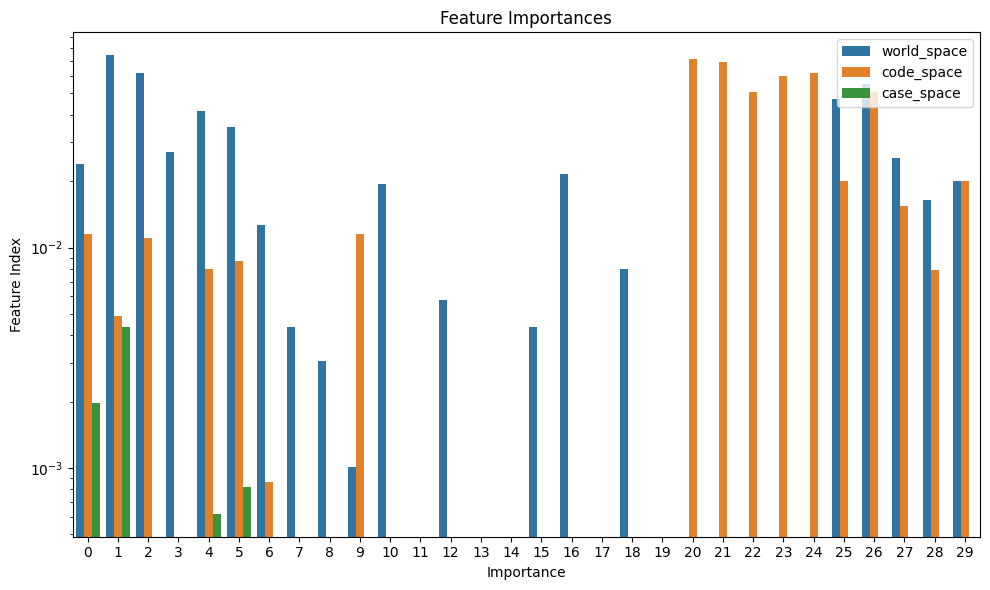

In [315]:
importances = models[0].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

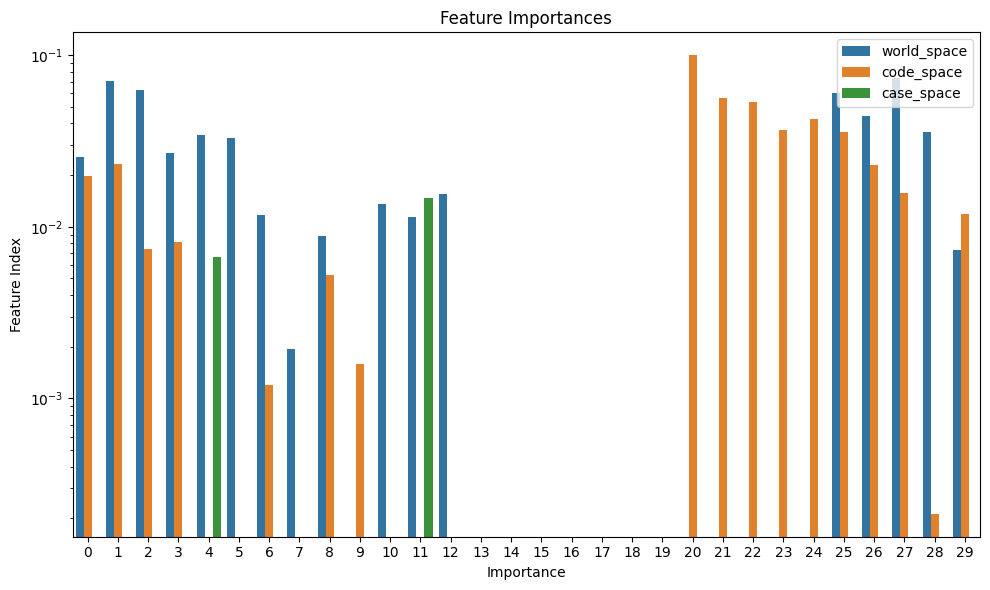

In [316]:
importances = models[1].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

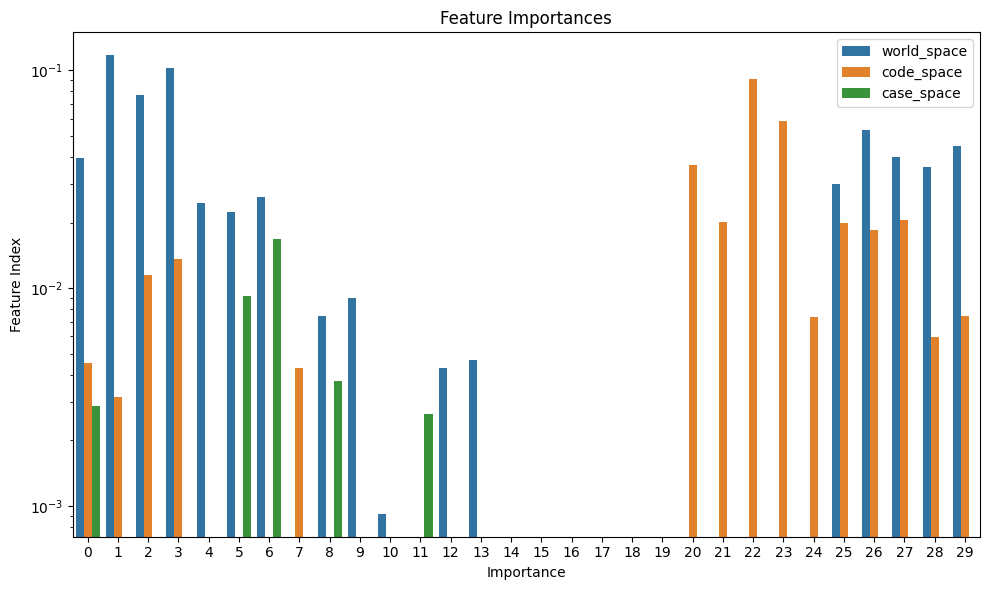

In [317]:
importances = models[2].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

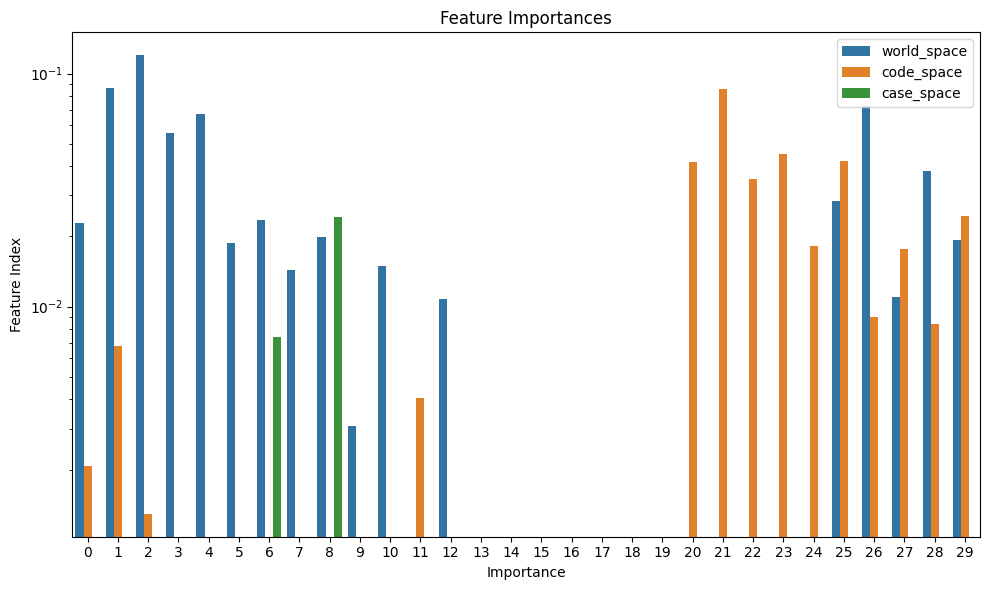

In [318]:
importances = models[3].feature_importances_

features_name = ['world_space', 'code_space', 'case_space']

plot_features_importance(importances, features_name, threshold=30)

In [319]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.65', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.70', 'Standard Deviation of Accuracy': '0.01'}]


In [320]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_case", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.74', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.73', 'Standard Deviation of Accuracy': '0.02'}]


In [321]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.66', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.03'}]


In [322]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.74', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.73', 'Standard Deviation of Accuracy': '0.03'}]


In [323]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.62', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.73', 'Standard Deviation of Accuracy': '0.01'}]


In [324]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "code", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.55', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.03'}]


In [325]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "case", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.58', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.67', 'Standard Deviation of Accuracy': '0.04'}]


In [326]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "case_world_code", 
              "evaluate": True,
              "k": 5,
              "padding":"post"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.74', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.74', 'Standard Deviation of Accuracy': '0.02'}]


In [327]:
method_params = [1, 2, 3, 4, 5, 6, 7, 8]

for n in method_params:
    args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": "truncate_subsequences", 
           "method_param": n, 
           "method_mode": 'last'} 

    args_model = {"model_type": "rf", 
                "epochs": 100, 
                "lr": 0.01, 
                "dropout": 0, 
                "weight_decay": 0.01,
                "test_size": 0.2, 
                "task": "world_code_case", 
                "evaluate": True,
                "k": 5,
                "padding":"post"}


    sequence_creator = SequenceCreator(data=df, **args_seq)
    model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

    results, model = model_trainer.cross_validate()
    print("With method mode last and method param", n)
    print(results)
    print("\n")

With method mode last and method param 1
[{'Mean AUC': '0.53', 'Standard Deviation of AUC': '0.03', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 2
[{'Mean AUC': '0.56', 'Standard Deviation of AUC': '0.05', 'Mean Accuracy': '0.72', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 3
[{'Mean AUC': '0.83', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.83', 'Standard Deviation of Accuracy': '0.02'}]


With method mode last and method param 4
[{'Mean AUC': '0.81', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 5
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.78', 'Standard Deviation of Accuracy': '0.01'}]


With method mode last and method param 6
[{'Mean AUC': '0.79', 'Standard Deviation of AUC': '0.04', 'Mean Accuracy': '0.79', 'Standard Deviation of Ac

In [361]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": True, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "logistic", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

results, model = model_trainer.cross_validate()

print(results)

[{'Mean AUC': '0.84', 'Standard Deviation of AUC': '0.02', 'Mean Accuracy': '0.80', 'Standard Deviation of Accuracy': '0.02'}]


In [369]:
args_seq ={"prediction": "success", 
           "activities": [1, 1, 1], 
           "split_type": "distribution", 
           "one_hot": False, 
           "sequence_method": None, 
           "method_param": 5, 
           "method_mode": 'first'} 

args_model = {"model_type": "rf", 
              "epochs": 100, 
              "lr": 0.01, 
              "dropout": 0, 
              "weight_decay": 0.01,
              "test_size": 0.2, 
              "task": "world_code_case", 
              "evaluate": True,
              "k": 5,
              "padding":"pre"}


sequence_creator = SequenceCreator(data=df, **args_seq)
model_trainer = ModelTrainer(sequence_creator=sequence_creator, **args_model)

loss_train_arr, loss_valid_arr, roc_auc, accuracy, fpr, tpr = model_trainer.train()

In [370]:
accuracy

0.8157894736842105